# Chapter 11

# 11.4.4. Implementation of PK models

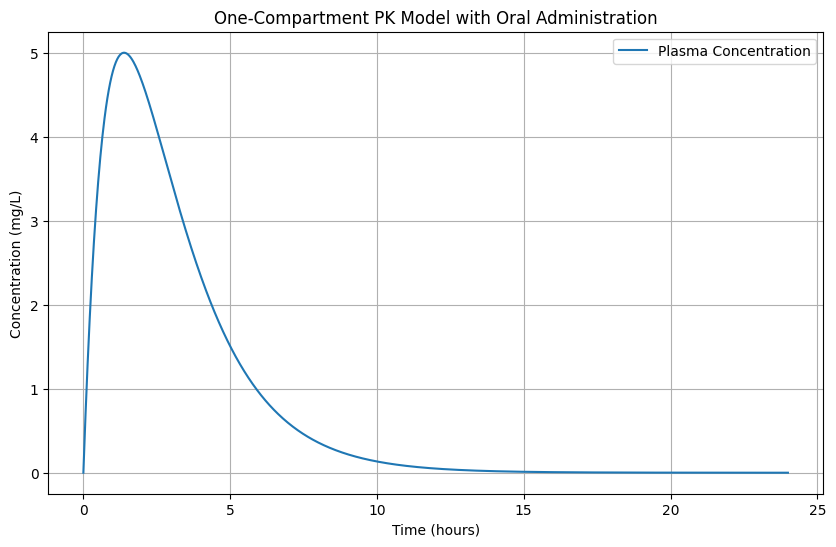

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the one-compartment model with first-order absorption and elimination
def one_compartment_model(y, t, ka, ke):
    A_gut, C_plasma = y
    dA_gut_dt = -ka * A_gut                         # Rate of change in the gut compartment
    dC_plasma_dt = (ka * A_gut) / Vd - ke * C_plasma  # Rate of change in the plasma compartment
    return [dA_gut_dt, dC_plasma_dt]

# Parameters for the model
Dose = 500        # Dose in mg
ka = 1.0          # Absorption rate constant (1/hour)
ke = 0.5          # Elimination rate constant (1/hour)
Vd = 50           # Volume of distribution (L)

# Initial conditions
A_gut0 = Dose     # Initial amount in the gut (mg)
C_plasma0 = 0     # Initial plasma concentration (mg/L)
y0 = [A_gut0, C_plasma0]

# Time points (hours)
time = np.linspace(0, 24, 1000)

# Solve the differential equations using odeint
solution = odeint(one_compartment_model, y0, time, args=(ka, ke))
A_gut = solution[:, 0]
C_plasma = solution[:, 1]

# Plot the concentration vs. time curve
plt.figure(figsize=(10, 6))
plt.plot(time, C_plasma, label='Plasma Concentration')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (mg/L)')
plt.title('One-Compartment PK Model with Oral Administration')
plt.legend()
plt.grid(True)
plt.show()